In [6]:
import pandas as pd
import plotly.express as px

In [5]:
df=pd.read_csv("Cleaned_Final.csv")

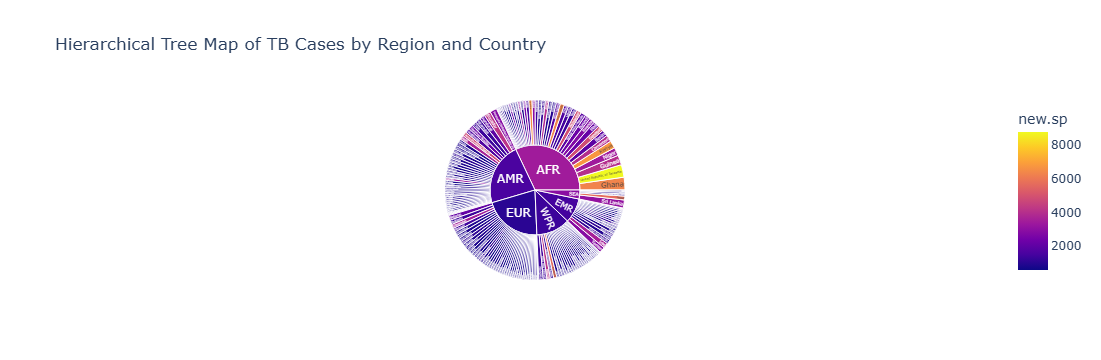

In [10]:
fig = px.sunburst(
    df,
    path=['g.whoregion', 'country'],  # Hierarchical levels: region > country
    values='new.sp',  # Metric (new TB cases, or you can choose another metric)
    color='new.sp',  # Color by the metric for visual intensity
    hover_data=['year'],  # Display the year when hovering
    title="Hierarchical Tree Map of TB Cases by Region and Country"
)

# Show the plot
fig.show()

In [12]:
pip install plotly dash pandas


   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/7.8 MB 138.1 kB/s eta 0:00:56
   ----------------------

In [15]:
pip install jupyter-dash


   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/19.1 MB 134.3 kB/s eta 0:02:22
   --------

In [17]:
pip install plotly dash jupyter-dash


Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install dash jupyter-dash plotly


Note: you may need to restart the kernel to use updated packages.


In [25]:
import pandas as pd
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Load the data
df = pd.read_csv("Cleaned_Final.csv")

# Dash app setup using Dash
app = dash.Dash(__name__)

# Layout of the app
app.layout = html.Div([
    html.H1("Timeline Visualization of TB Data"),
    dcc.Graph(id="timeline-graph"),
    dcc.RangeSlider(
        id="year-slider",
        min=df["year"].min(),
        max=df["year"].max(),
        step=1,
        marks={year: str(year) for year in df["year"].unique()},
        value=[df["year"].min(), df["year"].max()],
    ),
    dcc.Dropdown(
        id='column-dropdown',
        options=[{'label': col, 'value': col} for col in df.columns if col != 'year'],
        value='new.sp',  # Default selected column
        multi=False,
        clearable=False,
    ),
])

@app.callback(
    Output("timeline-graph", "figure"),
    [Input("year-slider", "value"),
     Input("column-dropdown", "value")]
)
def update_graph(year_range, selected_column):
    # Filter data based on the selected year range
    filtered_df = df[(df["year"] >= year_range[0]) & (df["year"] <= year_range[1])]
    
    # Create the animated plot based on selected column
    fig = px.scatter(
        filtered_df,
        x="year",
        y=selected_column,  # Use the selected column for the y-axis
        animation_frame="year",
        title=f"TB Data Timeline: {selected_column}",
        labels={"year": "Year", selected_column: selected_column},
    )
    
    # Return the plotly figure
    return fig

# Run the app with the "inline" mode to render within the notebook
app.run_server(debug=True, use_reloader=False, mode="inline")


---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
TypeError: keys must be str, int, float, bool or None, not numpy.int64

